#  Glasgow City Council 2007 Election


* The election data was originally provided by Jeffery O'Neill,  Open STV, www.OpenSTV.org, 2013.

* There are 11 candidate and 9560 voters. 
    
    1. Shaukat Butt ($B$)
    2. Michael Cobley ($C$) 
    3. Stephen Dornan ($D$)
    4. John Flanagan ($F$)
    5. Alan L Hughes ($H1$)
    6. Allison Hunter ($H2$)
    7. Will Jess ($J$)
    8. Irene Lang ($L$) 
    9. Patricia Mcintyre ($M1$)
    10. George Douglas Mcnee ($M2$)
    11. Carolina Perez ($P$)
  
* The election used STV for proportional representation.   However, in this notebook we are intrested in applying single-winner voting methods to the ranking data. 

* The processed rankings were downloaded from  [https://www.preflib.org/dataset/00008](https://www.preflib.org/dataset/00008).   The file contains incomplete total orders (a [toc file](https://www.preflib.org/format#types)). 

* There is a top cycle among Dornan, Flanagan and Hunter. 


In [1]:
from pref_voting.profiles_with_ties import *
from pref_voting.voting_methods import *
from preflibtools.instances import OrdinalInstance # use the preflibtools 

In [2]:

short_candname = {
    "Shaukat Butt": "B",
    "Michael Cobley": "C",
    "Stephen Dornan": "D",
    "John Flanagan": "F",
    "Alan L Hughes": "H1",
    "Allison Hunter": "H2",
    "Will Jess": "J",
    "Irene Lang": "L", 
    "Patricia Mcintyre": "M1",
    "George Douglas Mcnee": "M2",
    "Carolina Perez": "P",
}

# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./edata/scottland_govan_2007/00008-00000009.soi")

rankings = list()
rcounts = list()
for o in instance.orders:
    order = o
    rank = dict()
    
    for r,cs in enumerate(o): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
    

prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()

## uncomment to see the rankings
#prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()



There are 11 candidates and 9560 rankings:  
        The number of empty rankings: 0
        The number of rankings with ties: 0
        The number of linear orders: 369
        The number of truncated linear orders: 9191
        
The number of rankings with skipped ranks: 0
        
        


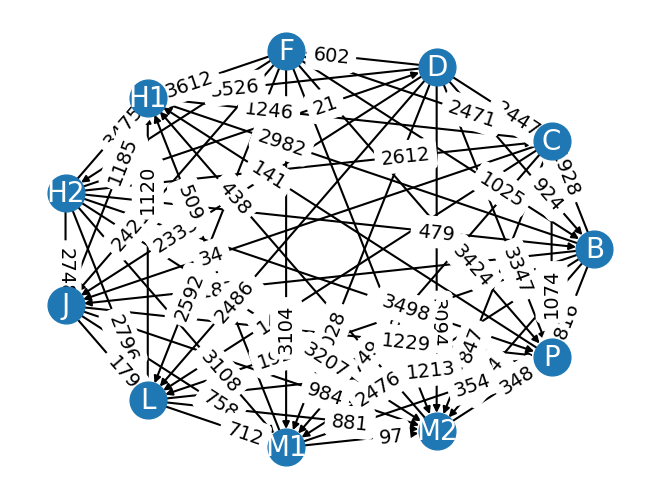

There is 1 cycle: 



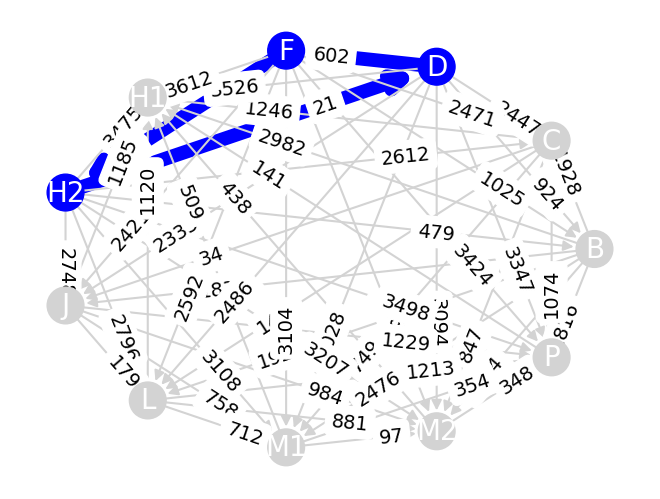

In [3]:
prof.display_margin_graph()

prof.margin_graph().display_cycles()


Smith Set winners are {D, F, H2}
Restrict to the Smith Set: 
There is 1 cycle: 



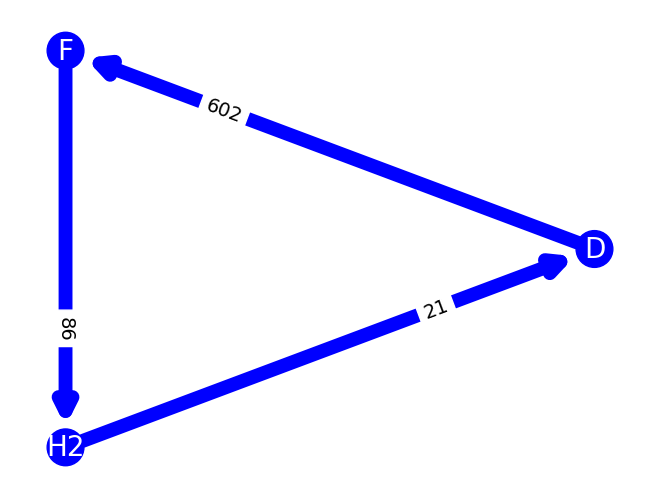

In [4]:
smith_set.display(prof)

print("Restrict to the Smith Set: ")
smith = smith_set(prof)

restricted_prof = prof.remove_candidates([c for c in prof.candidates if c not in smith])

## uncomment to see the rankings
#restricted_prof.display_rankings()
restricted_prof.use_extended_strict_preference()

restricted_prof.margin_graph().display_cycles()

Smith Set winners are {D, F, H2}
Restrict to the Smith Set: 
There is 1 cycle: 



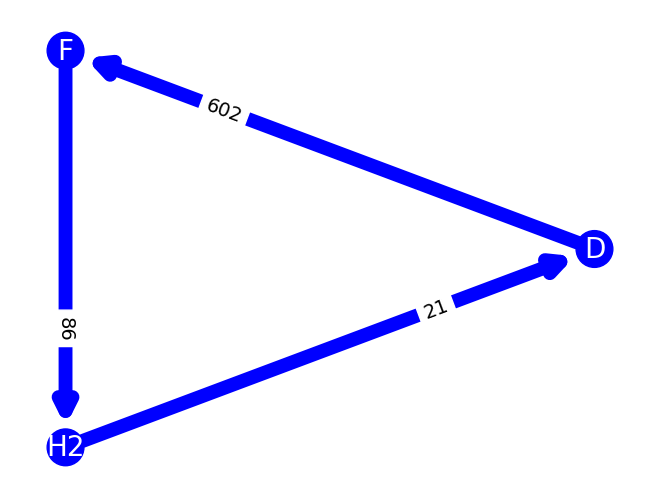

+-----+------+-----+------+-----+-----+-----+----+-----+
| 455 | 133  | 384 | 132  | 250 | 266 | 215 | 91 | 102 |
+-----+------+-----+------+-----+-----+-----+----+-----+
| H2  |  F   |  D  |  D   |  F  | H2  | H2  | D  |  F  |
| D F | D H2 |  F  | F H2 |  D  |  D  |  F  | H2 | H2  |
|     |      | H2  |      | H2  |  F  |  D  | F  |  D  |
+-----+------+-----+------+-----+-----+-----+----+-----+


In [5]:
smith_set.display(prof)

print("Restrict to the Smith Set: ")
smith = smith_set(prof)

restricted_prof = prof.remove_candidates([c for c in prof.candidates if c not in smith])
restricted_prof.use_extended_strict_preference()

restricted_prof.margin_graph().display_cycles()
restricted_prof.remove_empty_rankings()
r_prof = restricted_prof.add_unranked_candidates()
r_prof.display()

In [6]:

cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_Floyd_Warshall.display(prof)
copeland.display(prof)

print()

cl = prof.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")

There is no Condorcet winner.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Copeland winners are {D, F, H2}

The Condorcet loser is H1.


## Borda Winners in Restricted Profile

In [7]:
print("Symmetric Borda: ", 
      ", ".join([restricted_prof.cmap[c] for c in borda_for_profile_with_ties(restricted_prof, borda_scores = symmetric_borda_scores)]))    
print("Domination Borda: ", 
      ", ".join([restricted_prof.cmap[c] for c in borda_for_profile_with_ties(restricted_prof, borda_scores = domination_borda_scores)]))    

print("Weak Domination Borda: ", 
      ", ".join([restricted_prof.cmap[c] for c in borda_for_profile_with_ties(restricted_prof, borda_scores = weak_domination_borda_scores)]))    

print("Non-Domination Borda: ", 
      ", ".join([restricted_prof.cmap[c] for c in borda_for_profile_with_ties(restricted_prof, borda_scores = non_domination_borda_scores)]))    


Symmetric Borda:  D
Domination Borda:  H2
Weak Domination Borda:  D
Non-Domination Borda:  D


## Instant Runoff, Plurality and Plurality with Runoff in Restricted Profile

In [8]:
instant_runoff_for_truncated_linear_orders.display(restricted_prof)

plurality_with_runoff.display(restricted_prof)

plurality.display(restricted_prof)

Instant Runoff winner is {H2}
PluralityWRunoff winner is {H2}
Plurality winner is {H2}


## Instant Runoff, Plurality and Plurality with Runoff

In [9]:
instant_runoff_for_truncated_linear_orders.display(prof)

plurality_with_runoff.display(prof)

plurality.display(prof)

Instant Runoff winner is {H2}
PluralityWRunoff winner is {F}
Plurality winner is {H2}


## Using the Support Graph

Interestingly, the results of the margin-based methods (except Stable Voting) depend on whether the *margin* or *support* is used to compare candidates.   The *support* of candidate $a$ over $b$ is the number of voters that rank $a$ strictly above $b$.  



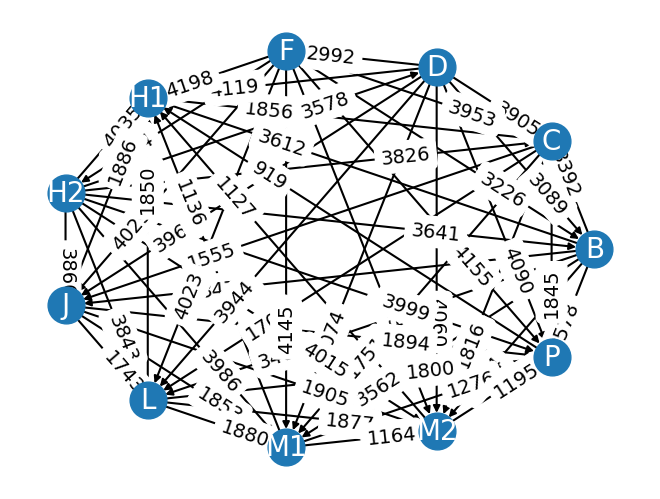

There is 1 cycle: 



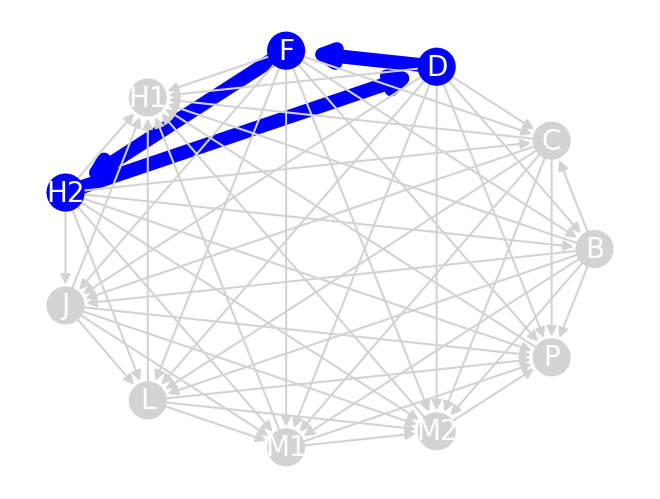

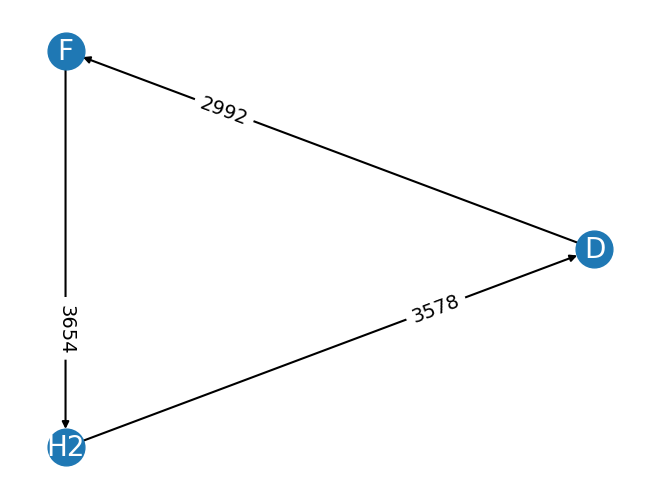

There is no Condorcet winner.


NameError: cannot access free variable 'a' where it is not associated with a value in enclosing scope

In [10]:
prof.display_support_graph()

sg = prof.support_graph()

sg.display_cycles()

smith = smith_set(sg)

restricted_sg = sg.remove_candidates([c for c in sg.candidates if c not in smith])

restricted_sg.display()

cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle.display(prof, strength_function=prof.support)
stable_voting.display(prof, strength_function=prof.support)
minimax.display(prof, strength_function=prof.support)
beat_path_faster.display(prof, strength_function=prof.support)

print()

cl = sg.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")
    
